### Import data

In [1]:
include("importData.jl")
include("Hill.jl")
include("plot.jl")

# import drug concentrations
param_lap_dde = CSV.read(".//figures//Lapatinib//params_lap_DDE.csv")
concentrations = permutedims(Vector(param_lap_dde[8,2:end]));
print(concentrations)

# import G1 and G2 data
pop, g2, g1, g1_0, g2_0 = get_data("..//data//lap.csv", "..//data//lap_pop.csv");

Any[0.0 5.0 10.0 25.0 50.0 100.0 250.0 500.0]

### Hill model, residual functions and optimization

In [2]:
# lower bound
low = 0.0001*zeros(16)
low = append!([5.0], low)

# upper bound
high_temp = [2.0, 2.0, 2.0]
high_ = repeat(high_temp, 4)
high = append!([300.0, 2.0, 2.0, 2.0, 2.0], high_)

guess = [100.0, 0.1, 1.1, 0.01, 0.1, 1.0, 0.01, 1.1, 0.1, 0.01, 1.1, 0.1, 0.01, 1.1, 0.01, 1.1, 0.01]

optimizer_result = optimize_hill(concentrations, guess, low, high)

Results of Optimization Algorithm
 * Algorithm: LevenbergMarquardt
 * Minimizer: [100.60830460205727,0.0005647657637821013,1.7922905943135168,0.01705988945476136,0.02162570937042113,2.0,0.013770353129474501,1.0708465445554214,0.14183203891766555,0.012835007155783795,1.1436121592598156,0.08474653639957878,0.0036016991887788813,0.805452134724183,0.013943540679858688,0.8781788188237254,0.0071811797200523175]
 * Sum of squares at Minimum: 397992.045871
 * Iterations: 19
 * Convergence: true
 * |x - x'| < 1.0e-08: true
 * |f(x) - f(x')| / |f(x)| < 1.0e-08: false
 * |g(x)| < 1.0e-08: false
 * Function Calls: 20
 * Gradient Calls: 9
 * Multiplication Calls: 57


### Plot Hill curve for all of the DDE model parameters

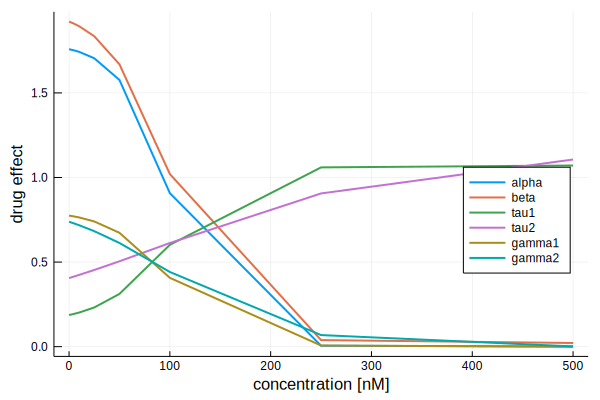

In [3]:
using Plots;
params = optimizer_result.minimizer
effects = zeros(6, 8)
for i in 1:8
    effects[1, i] = hill(params[1:4], concentrations[i])
    effects[2, i] = hill(append!([params[1]], params[5:7]), concentrations[i])
    effects[3, i] = hill(append!([params[1]], params[8:10]), concentrations[i])
    effects[4, i] = hill(append!([params[1]], params[11:13]), concentrations[i])
    effects[5, i] = hill(append!([params[1], 0], params[14:15]), concentrations[i])
    effects[6, i] = hill(append!([params[1], 0], params[16:17]), concentrations[i])
end


c = permutedims(Array(concentrations))
plot(c, effects[1, :], label = "alpha", linewidth = 2, xlabel = "concentration [nM]", ylabel = "drug effect")
plot!(c, effects[2, :], label = "beta", linewidth = 2, legend =:right)
plot!(c, effects[3, :], label = "tau1", linewidth = 2)
plot!(c, effects[4, :], label = "tau2", linewidth = 2)
plot!(c, effects[5, :], label = "gamma1", linewidth = 2)
plot!(c, effects[6, :], label = "gamma2", linewidth = 2)


### Plot the data with the new set of parameters for DDE

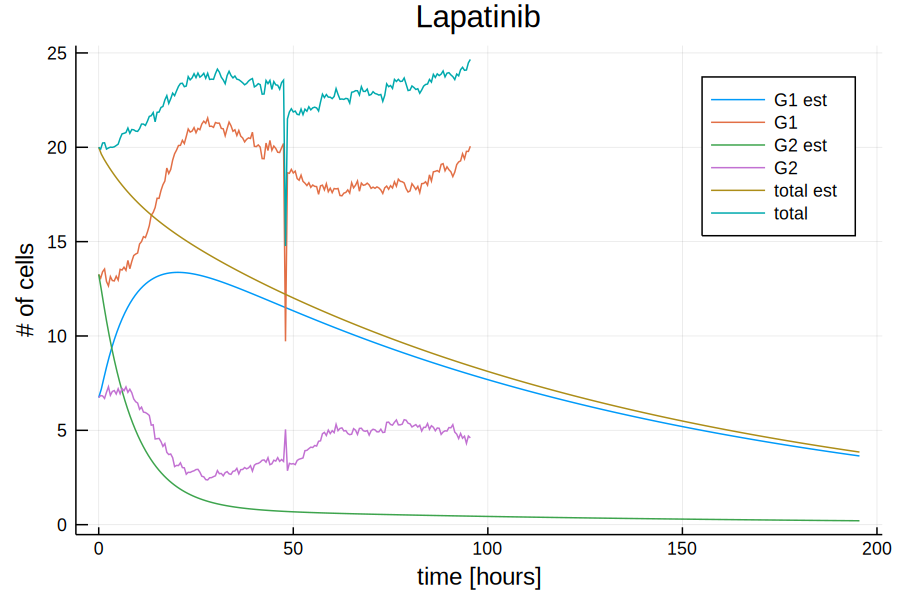

In [4]:
j = 7
# for instance we want to plot the data and estimated for some trial 
alpha_ = hill(params[1:4], concentrations[j])
beta_ = hill(append!([params[1]], params[5:7]), concentrations[j])
tau1_ = hill(append!([params[1]], params[8:10]), concentrations[j])
tau2_ =hill(append!([params[1]], params[11:13]), concentrations[j])
gamma1_ = hill(append!([params[1], 0], params[14:15]), concentrations[j])
gamma2_ = hill(append!([params[1], 0], params[16:17]), concentrations[j])

control = [alpha_, beta_, tau1_, tau2_, gamma1_, gamma2_]
plotIt(control, g1, g2, g1_0, g2_0, pop, j, "Lapatinib")
# print(control)